<a href="https://colab.research.google.com/github/renardelyon/ML-jamur/blob/main/ML_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package install

In [1]:
!pip install pycaret

     |████████████████████████████████| 266 kB 30.1 MB/s 
     |████████████████████████████████| 2.0 MB 35.5 MB/s 
     |████████████████████████████████| 261 kB 60.0 MB/s 
     |████████████████████████████████| 1.3 MB 48.3 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 113 kB 68.0 MB/s 
     |████████████████████████████████| 1.7 MB 39.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 167 kB 57.2 MB/s 
     |████████████████████████████████| 6.8 MB 41.8 MB/s 
     |████████████████████████████████| 303 kB 51.9 MB/s 
     |████████████████████████████████| 596 kB 35.1 MB/s 
     |████████████████████████████████| 3.1 MB 69.7 MB/s 
     |██████████████████

# Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
from pycaret.regression import *
import os

# Data Extraction

In [8]:
df = pd.read_csv('./Copy of yield.csv', sep='\t')

# Data Visualization

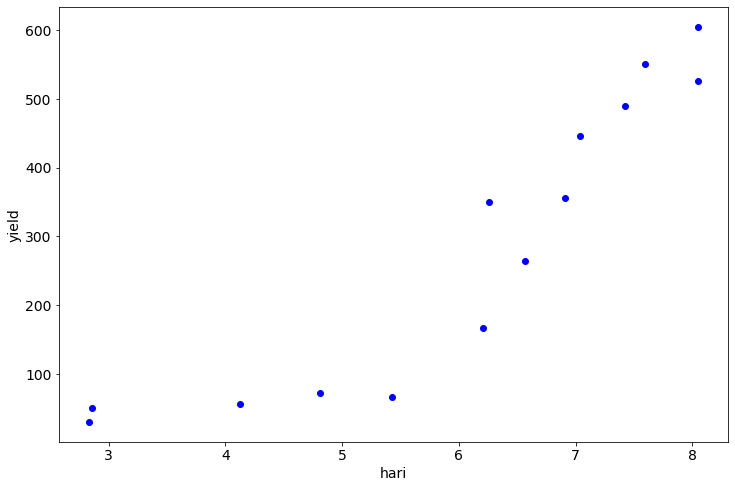

In [10]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12,8))
plt.plot(df['diameter'], df['yield'], 'bo')
plt.ylabel('yield')
plt.xlabel('hari')
plt.show()

# Setup data

In [11]:
reg1 = setup(data = df, target = 'yield', normalize=True, train_size=0.8)

,Description,Value
0,session_id,2902
1,Target,yield
2,Original Data,"(14, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11, 1)"


# Compare models

In [14]:
best = compare_models(errors='raise', fold=5, n_select=3, sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,37.1993,2442.2520,42.2003,0.0848,0.1633,0.1618,0.416
gbr,Gradient Boosting Regressor,53.7259,5030.5058,61.2152,-0.4707,0.2330,0.2269,0.040
dt,Decision Tree Regressor,53.7256,5030.5670,61.2159,-0.4709,0.2330,0.2269,0.016
ada,AdaBoost Regressor,53.7256,5030.5670,61.2159,-0.4709,0.2330,0.2269,0.078
rf,Random Forest Regressor,57.4828,6657.4310,66.6861,-3.8514,0.3146,0.3596,0.476
par,Passive Aggressive Regressor,79.0214,9075.7105,87.5930,-30.1359,0.3730,0.6487,0.018
huber,Huber Regressor,82.6684,10415.2733,94.3812,-41.4308,0.3868,0.6942,0.020
ridge,Ridge Regression,87.0054,9883.1262,94.7147,-23.6644,0.3771,0.6439,0.016
lasso,Lasso Regression,84.3696,11924.3096,99.3687,-53.6755,0.3977,0.7187,0.020
llar,Lasso Least Angle Regression,85.0426,11810.8731,99.4566,-51.3678,0.3998,0.7177,0.018


# Train model
using extra tree regressor



In [15]:
et = create_model('et', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,77.9457,7337.2375,85.6577,0.3202,0.4618,0.5321
1,29.0303,1025.4861,32.0232,0.9770,0.2193,0.2203
2,39.7297,2014.0149,44.8778,0.5486,0.0932,0.0776
Mean,48.9019,3458.9128,54.1862,0.6153,0.2581,0.2767
SD,20.9965,2771.9246,22.8641,0.2722,0.1530,0.1898


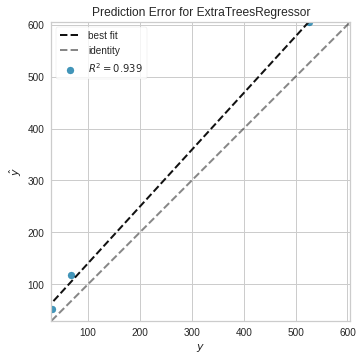

In [17]:
plot_model(et, plot='error')

# Predict Model

In [22]:
pred_holdout = predict_model(et, data=df[['diameter']])

In [23]:
pred_holdout

,diameter,Label
0,2.831881,51.225807
1,2.855904,51.225807
2,4.122458,56.451614
3,5.426352,117.615207
4,4.811324,72.129036
5,6.210201,166.891891
6,6.566866,264.189178
7,6.261520,349.324310
8,6.912029,355.405396
9,7.038379,446.621613


# Save Model

In [24]:
curr_dir = os.getcwd()
model_name = 'extra_tree_regressor'

save_model(et, os.path.join(curr_dir, model_name))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='yield',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    

# Deploy model

In [25]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=''

In [26]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=dPjSENtLXom2iVtstrSGPaxjOvJ9np&prompt=consent&access_type=offline&code_challenge=wtRDBkgXe16ZrzabbsDQOR7SoK7h0jIqC3aIp9OiJnY&code_challenge_method=S256

Enter verification code: 4/1AX4XfWi3esnFl5G2M1QY9VpkBu0uwYNIifYQpmv-6JfeqbaMZMlRZBkfakc

You are now logged in as [renard.elyon.r@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


To take a quick anonymous survey, run:
  $ gcloud survey



In [30]:
!gsutil ls gs://tugas-akhir-332404-ml

gs://tugas-akhir-332404-ml/et_gcp.pkl
gs://tugas-akhir-332404-ml/rf_gcp.pkl


In [29]:
deploy_model(et, model_name = 'et_gcp', platform = 'gcp', 
             authentication = { 'bucket'  : 'tugas-akhir-332404-ml',
                                 'project': 'tugas-akhir-332404'})

Model Successfully Deployed on GCP
